<a href="https://colab.research.google.com/github/Harshit50/Stress-and-Affect-Detection/blob/main/Project_1_FDA_Harshit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/FDA/Project_1/
!ls -lrth

Mounted at /content/drive
/content/drive/MyDrive/FDA/Project_1
total 3.1M
-rw------- 1 root root 3.1M Jan 31 21:11 DEMO_DATA.csv
drwx------ 2 root root 4.0K Feb  4 00:41 Physio_data
drwx------ 2 root root 4.0K Feb  4 00:41 Lab_data


In [ ]:
import pandas as pd
from tabulate import tabulate
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_demo= pd.read_csv('DEMO_DATA.csv', sep = '\t')
df_demo

,Unnamed: 0,hadm_id,age,gender,marital_status,religion,ethnicity
0,0,165315,64.971282,F,MARRIED,NONE,WHITE
1,1,152223,71.178910,M,MARRIED,CHRISTIAN,WHITE
2,2,124321,75.306343,M,MARRIED,CHRISTIAN,WHITE
3,3,161859,39.042949,M,SINGLE,CHRISTIAN,WHITE
4,4,129635,58.989281,M,MARRIED,NONE,WHITE
...,...,...,...,...,...,...,...
58971,58971,191113,19.413381,F,SINGLE,NONE,WHITE
58972,58972,101071,83.509132,F,WIDOWED,CHRISTIAN,WHITE
58973,58973,122631,42.559732,M,MARRIED,NONE,WHITE
58974,58974,170407,60.808503,F,MARRIED,CHRISTIAN,WHITE


In [ ]:
print(df_demo.shape)

(58976, 7)


### ***Visualisation of the Columns of Demo data***

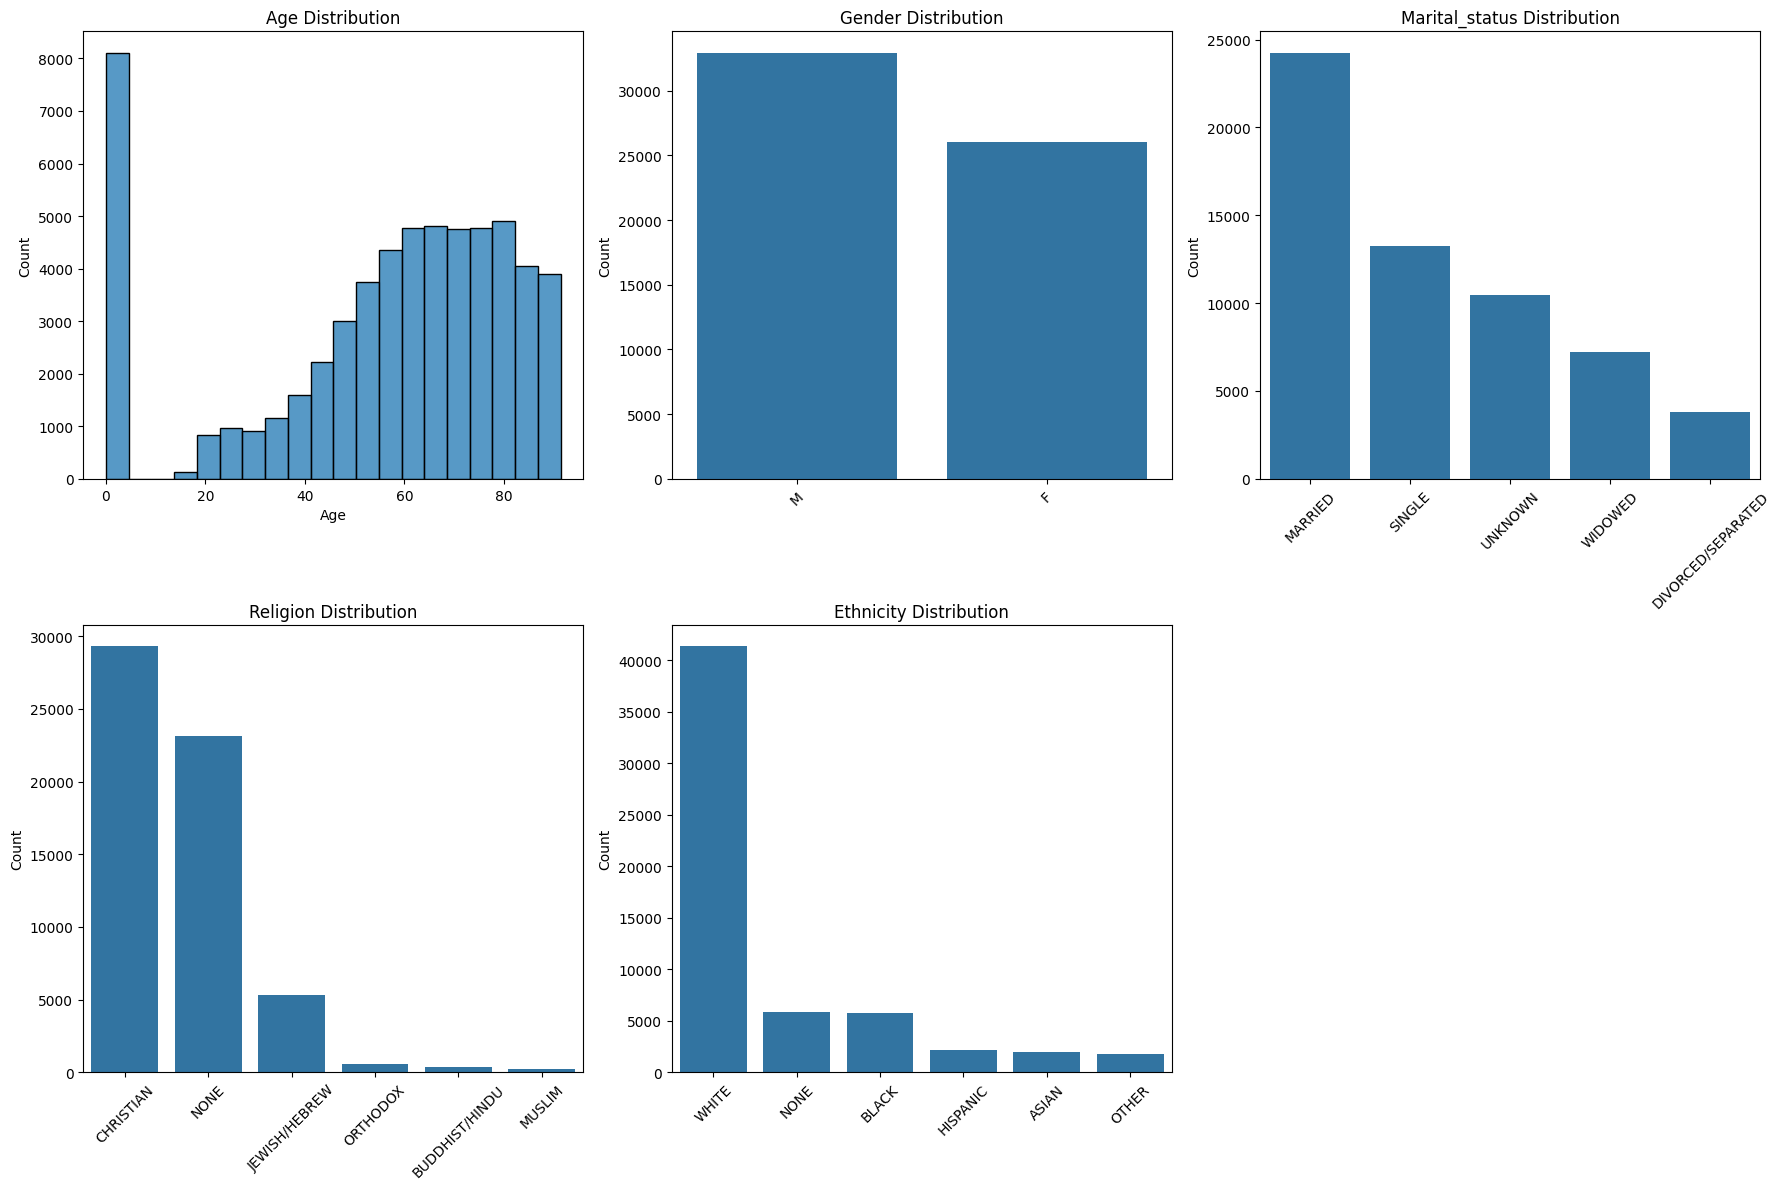

In [ ]:
df_demo.replace([np.inf, -np.inf], np.nan, inplace=True)

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Histogram for age
sns.histplot(df_demo['age'], bins=20, kde=False, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Count')

# Bar plots for categorical variables
categorical_vars = ['gender', 'marital_status', 'religion', 'ethnicity']
bar_axes = [axes[0, 1], axes[0, 2], axes[1, 0], axes[1, 1]]

for var, ax in zip(categorical_vars, bar_axes):
    sns.countplot(x=var, data=df_demo, ax=ax, order=df_demo[var].value_counts().index)
    ax.set_title(f'{var.capitalize()} Distribution')
    ax.set_xlabel('')
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)  # Rotate labels for readability

# Hide the empty subplot
axes[1, 2].axis('off')

# Adjust layout and display
plt.tight_layout()
plt.show()


### ***Reading the Dataset of Physio Data***

In [ ]:
# Reading Physio data
%cd /content/drive/MyDrive/FDA/Project_1/Physio_data
!ls -lrth

/content/drive/MyDrive/FDA/Project_1/Physio_data
total 16M
-rw------- 1 root root  1.3M Feb  4 00:31 ART_PH.csv
-rw------- 1 root root  1.4M Feb  4 00:31 CVP.csv
-rw------- 1 root root  2.3M Feb  4 00:31 DIAS_PRESS.csv
-rw------- 1 root root  2.4M Feb  4 00:32 HR.csv
-rw------- 1 root root  2.4M Feb  4 00:32 RESP_RATE.csv
-rw------- 1 root root  2.3M Feb  4 00:32 SPO2.csv
-rw------- 1 root root  2.3M Feb  4 00:32 SYS_PRESS.csv
-rw------- 1 root root 1017K Feb  4 00:32 TEMP.csv


In [ ]:
df_art = pd.read_csv('ART_PH.csv', sep = '\t')
df_cvp = pd.read_csv('CVP.csv', sep = '\t')
df_dia = pd.read_csv('DIAS_PRESS.csv', sep = '\t')
df_hr = pd.read_csv('HR.csv', sep = '\t')
df_resp = pd.read_csv('RESP_RATE.csv', sep = '\t')
df_sp = pd.read_csv('SPO2.csv', sep = '\t')
df_sys = pd.read_csv('SYS_PRESS.csv', sep = '\t')
df_temp = pd.read_csv('TEMP.csv', sep = '\t')

In [ ]:
df_art

,Unnamed: 0,hadm_id,avg_art_ph,std_art_ph
0,0,100006,7.380000,0.036515
1,1,100029,NaN,NaN
2,2,100031,7.368421,0.059560
3,3,100033,7.360000,NaN
4,4,100036,7.378000,0.078003
...,...,...,...,...
57812,57812,199979,NaN,NaN
57813,57813,199984,NaN,NaN
57814,57814,199987,NaN,NaN
57815,57815,199992,NaN,NaN


In [ ]:
df_cvp

,Unnamed: 0,hadm_id,avg_cvp,std_cvp
0,0,100003,10.500000,2.368778
1,1,100007,7.125000,3.190207
2,2,100009,9.526316,5.956961
3,3,100010,9.294118,4.239278
4,4,100012,10.111111,4.850789
...,...,...,...,...
57808,57808,199984,NaN,NaN
57809,57809,199986,NaN,NaN
57810,57810,199987,NaN,NaN
57811,57811,199992,NaN,NaN


In [ ]:
df_dia

,Unnamed: 0,hadm_id,avg_dias_press,std_dias_press
0,0,100001,92.780822,10.397979
1,1,100003,60.615385,12.249296
2,2,100006,82.169811,12.498740
3,3,100007,67.164557,11.336836
4,4,100009,51.175439,6.118248
...,...,...,...,...
57828,57828,199913,NaN,NaN
57829,57829,199917,NaN,NaN
57830,57830,199918,NaN,NaN
57831,57831,199954,NaN,NaN


In [ ]:
df_hr

,Unnamed: 0,hadm_id,avg_hr,std_hr
0,0,100001,111.313953,12.399489
1,1,100003,81.218182,8.343751
2,2,100006,108.630252,9.944648
3,3,100007,79.444444,11.623253
4,4,100009,68.968750,12.208465
...,...,...,...,...
57830,57830,199753,NaN,NaN
57831,57831,199781,NaN,NaN
57832,57832,199794,NaN,NaN
57833,57833,199882,NaN,NaN


In [ ]:
df_resp

,Unnamed: 0,hadm_id,avg_resp_rate,std_resp_rate
0,0,100001,17.357143,2.560263
1,1,100003,15.818182,2.815900
2,2,100006,18.647059,3.330873
3,3,100007,19.185185,4.461253
4,4,100009,23.515625,6.409299
...,...,...,...,...
57830,57830,199753,NaN,NaN
57831,57831,199781,NaN,NaN
57832,57832,199794,NaN,NaN
57833,57833,199882,NaN,NaN


In [ ]:

df_sp

,Unnamed: 0,hadm_id,avg_spo2,std_spo2
0,0,100001,97.604167,0.961815
1,1,100003,98.229167,2.746290
2,2,100006,97.861789,2.564976
3,3,100007,97.960526,2.187484
4,4,100009,96.174603,2.028345
...,...,...,...,...
57827,57827,199913,NaN,NaN
57828,57828,199917,NaN,NaN
57829,57829,199918,NaN,NaN
57830,57830,199954,NaN,NaN


In [ ]:
df_sys

,Unnamed: 0,hadm_id,avg_sys_press,std_sys_press
0,0,100001,174.191781,21.503654
1,1,100003,116.519231,17.056412
2,2,100006,140.509434,12.972678
3,3,100007,140.746835,12.303292
4,4,100009,110.543860,12.652033
...,...,...,...,...
57828,57828,199913,NaN,NaN
57829,57829,199917,NaN,NaN
57830,57830,199918,NaN,NaN
57831,57831,199954,NaN,NaN


In [ ]:
df_temp

,Unnamed: 0,hadm_id,avg_temp,std_temp
0,0,100031,36.918382,0.450219
1,1,100036,37.193750,0.401560
2,2,100050,37.362069,0.678451
3,3,100058,NaN,NaN
4,4,100059,37.069696,0.377893
...,...,...,...,...
57789,57789,199987,NaN,NaN
57790,57790,199988,NaN,NaN
57791,57791,199992,NaN,NaN
57792,57792,199994,NaN,NaN


### ***Reading the Dataset of Lab Data***




In [ ]:
# Reading Lab Data
%cd /content/drive/MyDrive/FDA/Project_1/Lab_data
!ls -lrth

/content/drive/MyDrive/FDA/Project_1/Lab_data
total 124M
-rw------- 1 root root 920K Feb  4 00:29 ALBUMIN.csv
-rw------- 1 root root 2.1M Feb  4 00:29 BICARBONATE.csv
-rw------- 1 root root 2.1M Feb  4 00:30 BLOOD_GLUCOSE.csv
-rw------- 1 root root 2.1M Feb  4 00:30 BLOOD_UREA_NITROGEN.csv
-rw------- 1 root root 2.1M Feb  4 00:30 CREATININE.csv
-rw------- 1 root root 2.3M Feb  4 00:30 HEMATROCRIT.csv
-rw------- 1 root root 2.3M Feb  4 00:30 PLATELET_COUNT.csv
-rw------- 1 root root 2.2M Feb  4 00:31 POTASSSIUM.csv
-rw------- 1 root root 2.2M Feb  4 00:31 SODIUM.csv
-rw------- 1 root root 2.2M Feb  4 00:31 WHITE_BLOOD_CELLS.csv
-rw------- 1 root root  27M Feb 17 19:38 patients_data.csv
-rw------- 1 root root  21M Feb 17 19:52 patients_data_2.csv
-rw------- 1 root root  30M Feb 17 22:28 df_patients_std.csv
-rw------- 1 root root  26M Feb 17 23:25 cleaned_data.csv
-rw------- 1 root root 1.8M Feb 19 02:25 Sample.csv


In [ ]:
df_alb = pd.read_csv('ALBUMIN.csv', sep = '\t')
df_HCO3 = pd.read_csv('BICARBONATE.csv', sep = '\t')
df_glu = pd.read_csv('BLOOD_GLUCOSE.csv', sep = '\t')
df_urea = pd.read_csv('BLOOD_UREA_NITROGEN.csv', sep = '\t')
df_creat = pd.read_csv('CREATININE.csv', sep = '\t')
df_hema = pd.read_csv('HEMATROCRIT.csv', sep = '\t')
df_plate = pd.read_csv('PLATELET_COUNT.csv', sep = '\t')
df_K = pd.read_csv('POTASSSIUM.csv', sep = '\t')
df_NA = pd.read_csv('SODIUM.csv', sep = '\t')
df_whitecells = pd.read_csv('WHITE_BLOOD_CELLS.csv', sep = '\t')

In [ ]:
df_alb

,Unnamed: 0,hadm_id,avg_albumin,std_albumin
0,0,150366.0,4.600000,NaN
1,1,128842.0,2.200000,NaN
2,2,154214.0,2.200000,NaN
3,3,168049.0,3.750000,0.494975
4,4,192833.0,3.650000,0.353553
...,...,...,...,...
30997,30997,163773.0,4.300000,NaN
30998,30998,139744.0,3.254545,0.220743
30999,30999,166346.0,3.214286,0.069007
31000,31000,154874.0,3.100000,NaN


In [ ]:
df_HCO3

,Unnamed: 0,hadm_id,avg_bicarbonate,std_bicarbonate
0,0,155703.0,24.555556,2.127858
1,1,130406.0,26.375000,3.583195
2,2,194150.0,22.800000,2.387467
3,3,117336.0,24.500000,0.707107
4,4,167276.0,25.750000,1.624466
...,...,...,...,...
52827,52827,135006.0,23.000000,3.674235
52828,52828,158829.0,27.125000,1.457738
52829,52829,150366.0,26.600000,1.673320
52830,52830,128842.0,28.200000,2.201010


In [ ]:
df_glu

,Unnamed: 0,hadm_id,avg_blood_glucose,std_blood_glucose
0,0,100001.0,165.428571,80.236875
1,1,100003.0,96.833333,26.798632
2,2,100006.0,105.000000,33.578267
3,3,100007.0,118.333333,28.748913
4,4,100009.0,152.235294,42.697379
...,...,...,...,...
50653,50653,199994.0,112.692308,20.898104
50654,50654,199995.0,112.833333,23.779007
50655,50655,199998.0,129.714286,29.504703
50656,50656,199999.0,119.875000,23.104962


In [ ]:
df_urea

,Unnamed: 0,hadm_id,avg_blood_urea_nitrogen,std_blood_urea_nitrogen
0,0,160080.0,37.411765,14.387750
1,1,178397.0,30.333333,15.502688
2,2,118666.0,19.818182,7.337636
3,3,194630.0,16.375000,1.927866
4,4,181455.0,12.666667,3.741657
...,...,...,...,...
51004,51004,117872.0,13.428571,2.299068
51005,51005,154542.0,15.400000,1.140175
51006,51006,173064.0,29.437500,5.291109
51007,51007,100795.0,14.444444,2.185813


In [ ]:
df_creat

,Unnamed: 0,hadm_id,avg_creatinine,std_creatinine
0,0,100001.0,2.214286,0.217882
1,1,100003.0,1.083333,0.147196
2,2,100006.0,0.638462,0.076795
3,3,100007.0,0.666667,0.086603
4,4,100009.0,0.783333,0.040825
...,...,...,...,...
50994,50994,199994.0,3.025000,0.562664
50995,50995,199995.0,0.664286,0.074495
50996,50996,199998.0,0.933333,0.186190
50997,50997,199999.0,0.962500,0.213391


In [ ]:
df_hema

,Unnamed: 0,hadm_id,avg_hematrocrit,std_hematrocrit
0,0,100001.0,32.157143,2.304964
1,1,100003.0,27.781818,2.644927
2,2,100006.0,31.853846,2.733318
3,3,100007.0,30.600000,4.668129
4,4,100009.0,35.914286,3.575112
...,...,...,...,...
57098,57098,199994.0,30.754545,2.323516
57099,57099,199995.0,26.462500,2.113725
57100,57100,199998.0,27.755556,3.744700
57101,57101,199999.0,35.425000,2.369298


In [ ]:
df_plate

,Unnamed: 0,hadm_id,avg_platelet_count,std_platelet_count
0,0,100001.0,364.428571,61.546343
1,1,100003.0,145.285714,27.219566
2,2,100006.0,228.615385,35.998932
3,3,100007.0,199.750000,32.003348
4,4,100009.0,142.571429,28.814679
...,...,...,...,...
56972,56972,199994.0,193.181818,19.752560
56973,56973,199995.0,402.600000,120.387351
56974,56974,199998.0,174.500000,59.206660
56975,56975,199999.0,344.250000,97.291535


In [ ]:
df_K

,Unnamed: 0,hadm_id,avg_potasssium,std_potasssium
0,0,100001.0,4.035714,0.501700
1,1,100003.0,4.783333,0.556477
2,2,100006.0,4.076923,0.297640
3,3,100007.0,3.955556,0.412647
4,4,100009.0,4.242857,0.222539
...,...,...,...,...
52874,52874,199994.0,4.183333,0.622069
52875,52875,199995.0,4.138462,0.295912
52876,52876,199998.0,4.200000,0.393700
52877,52877,199999.0,3.962500,0.346152


In [ ]:
df_NA

,Unnamed: 0,hadm_id,avg_sodium,std_sodium
0,0,100001.0,139.571429,3.251373
1,1,100003.0,132.000000,1.264911
2,2,100006.0,131.384615,1.980676
3,3,100007.0,139.111111,2.713137
4,4,100009.0,137.714286,3.039424
...,...,...,...,...
52855,52855,199994.0,135.583333,4.795042
52856,52856,199995.0,138.000000,1.699673
52857,52857,199998.0,139.600000,1.673320
52858,52858,199999.0,132.750000,3.105295


In [ ]:
df_whitecells

,Unnamed: 0,hadm_id,avg_white_blood_cells,std_white_blood_cells
0,0,155703.0,12.161538,2.580226
1,1,130406.0,12.057143,2.805861
2,2,194150.0,13.350000,2.762426
3,3,117336.0,8.850000,0.919239
4,4,167276.0,9.696667,1.705869
...,...,...,...,...
56987,56987,135006.0,4.250000,0.777817
56988,56988,158829.0,9.071429,2.485098
56989,56989,150366.0,13.100000,5.358358
56990,56990,128842.0,11.000000,1.393864


### ***Creating a list of all Dataset to merge the data in one dataframe***

In [ ]:
#creating a list of all the dataset to merge
all_data = [df_demo, df_art, df_cvp, df_dia, df_hr, df_resp, df_sp, df_sys, df_temp, df_alb, df_HCO3, df_glu, df_urea, df_creat, df_hema, df_plate, df_K, df_NA, df_whitecells]

In [ ]:
# removing the unnamed column repeated in every dataset
for df in all_data[1:]:
    if 'Unnamed: 0' in df.columns:
        df.drop(columns=['Unnamed: 0'], inplace=True)

# merging the dataset with demo data
df_patients = all_data[0]
for i in range(1, len(all_data)):
    df_patients = pd.merge(df_patients, all_data[i], on='hadm_id', how='left')

In [ ]:
df_patients

,Unnamed: 0,hadm_id,age,gender,marital_status,religion,ethnicity,avg_art_ph,std_art_ph,avg_cvp,...,avg_hematrocrit,std_hematrocrit,avg_platelet_count,std_platelet_count,avg_potasssium,std_potasssium,avg_sodium,std_sodium,avg_white_blood_cells,std_white_blood_cells
0,0,165315,64.971282,F,MARRIED,NONE,WHITE,NaN,NaN,NaN,...,35.900000,NaN,259.000,NaN,3.9000,0.707107,141.000000,1.414214,5.100000,NaN
1,1,152223,71.178910,M,MARRIED,CHRISTIAN,WHITE,7.366000,0.055217,8.192308,...,25.911111,2.512690,116.000,15.769168,3.9200,0.178885,141.500000,2.121320,8.533333,0.901850
2,2,124321,75.306343,M,MARRIED,CHRISTIAN,WHITE,NaN,NaN,NaN,...,34.837500,3.747737,181.875,23.745300,3.8125,0.247487,139.250000,3.494894,12.162500,2.969818
3,3,161859,39.042949,M,SINGLE,CHRISTIAN,WHITE,NaN,NaN,NaN,...,40.866667,0.416333,207.000,8.485281,3.9750,0.095743,140.000000,1.154701,9.366667,0.378594
4,4,129635,58.989281,M,MARRIED,NONE,WHITE,7.334286,0.038668,11.162162,...,31.333333,3.039737,192.625,50.022673,3.9500,0.907043,136.555556,2.185813,10.571429,2.232125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58971,58971,191113,19.413381,F,SINGLE,NONE,WHITE,NaN,NaN,NaN,...,36.840000,5.542833,207.500,42.035699,3.7600,0.421900,136.800000,5.069517,9.825000,3.649087
58972,58972,101071,83.509132,F,WIDOWED,CHRISTIAN,WHITE,NaN,NaN,NaN,...,42.200000,NaN,271.000,NaN,NaN,NaN,NaN,NaN,30.300000,NaN
58973,58973,122631,42.559732,M,MARRIED,NONE,WHITE,NaN,NaN,NaN,...,37.800000,2.200909,214.000,36.551334,4.8000,0.594418,140.000000,1.897367,12.200000,2.997499
58974,58974,170407,60.808503,F,MARRIED,CHRISTIAN,WHITE,NaN,NaN,NaN,...,28.150000,2.014141,231.000,61.244387,3.8400,0.366060,137.846154,3.460399,9.847059,2.493521


In [ ]:
df_patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58976 entries, 0 to 58975
Data columns (total 43 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               58976 non-null  int64  
 1   hadm_id                  58976 non-null  int64  
 2   age                      58976 non-null  float64
 3   gender                   58976 non-null  object 
 4   marital_status           58976 non-null  object 
 5   religion                 58976 non-null  object 
 6   ethnicity                58976 non-null  object 
 7   avg_art_ph               18063 non-null  float64
 8   std_art_ph               15030 non-null  float64
 9   avg_cvp                  18426 non-null  float64
 10  std_cvp                  18267 non-null  float64
 11  avg_dias_press           49035 non-null  float64
 12  std_dias_press           49016 non-null  float64
 13  avg_hr                   56714 non-null  float64
 14  std_hr                

In [ ]:
# looking for missing values in the dataset
missing_values = df_patients.isnull()
missing_values

,Unnamed: 0,hadm_id,age,gender,marital_status,religion,ethnicity,avg_art_ph,std_art_ph,avg_cvp,...,avg_hematrocrit,std_hematrocrit,avg_platelet_count,std_platelet_count,avg_potasssium,std_potasssium,avg_sodium,std_sodium,avg_white_blood_cells,std_white_blood_cells
0,False,False,False,False,False,False,False,True,True,True,...,False,True,False,True,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58971,False,False,False,False,False,False,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
58972,False,False,False,False,False,False,False,True,True,True,...,False,True,False,True,True,True,True,True,False,True
58973,False,False,False,False,False,False,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
58974,False,False,False,False,False,False,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# calculating all the missing values in various columns
missing_values.sum()

,0
Unnamed: 0,0
hadm_id,0
age,0
gender,0
marital_status,0
religion,0
ethnicity,0
avg_art_ph,40913
std_art_ph,43946
avg_cvp,40550


### ***Removing the columns values with more than 40% of the missing/null values***

In [ ]:
# calculating the sum of null values for every column
null_counts = df_patients.isnull().sum()

# Identify columns with more than 20000 null values
columns_to_drop = null_counts[null_counts > 24000].index

# Drop the identified columns
df_cleaned = df_patients.drop(columns = columns_to_drop)

In [ ]:
df_cleaned

,Unnamed: 0,hadm_id,age,gender,marital_status,religion,ethnicity,avg_dias_press,std_dias_press,avg_hr,...,avg_hematrocrit,std_hematrocrit,avg_platelet_count,std_platelet_count,avg_potasssium,std_potasssium,avg_sodium,std_sodium,avg_white_blood_cells,std_white_blood_cells
0,0,165315,64.971282,F,MARRIED,NONE,WHITE,74.307692,8.882423,101.875000,...,35.900000,NaN,259.000,NaN,3.9000,0.707107,141.000000,1.414214,5.100000,NaN
1,1,152223,71.178910,M,MARRIED,CHRISTIAN,WHITE,56.613636,6.651511,90.139535,...,25.911111,2.512690,116.000,15.769168,3.9200,0.178885,141.500000,2.121320,8.533333,0.901850
2,2,124321,75.306343,M,MARRIED,CHRISTIAN,WHITE,64.860000,15.398131,76.694444,...,34.837500,3.747737,181.875,23.745300,3.8125,0.247487,139.250000,3.494894,12.162500,2.969818
3,3,161859,39.042949,M,SINGLE,CHRISTIAN,WHITE,74.625000,10.346497,67.923077,...,40.866667,0.416333,207.000,8.485281,3.9750,0.095743,140.000000,1.154701,9.366667,0.378594
4,4,129635,58.989281,M,MARRIED,NONE,WHITE,50.571429,10.242767,76.321839,...,31.333333,3.039737,192.625,50.022673,3.9500,0.907043,136.555556,2.185813,10.571429,2.232125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58971,58971,191113,19.413381,F,SINGLE,NONE,WHITE,57.250000,9.175912,89.318182,...,36.840000,5.542833,207.500,42.035699,3.7600,0.421900,136.800000,5.069517,9.825000,3.649087
58972,58972,101071,83.509132,F,WIDOWED,CHRISTIAN,WHITE,80.384615,6.331646,85.461538,...,42.200000,NaN,271.000,NaN,NaN,NaN,NaN,NaN,30.300000,NaN
58973,58973,122631,42.559732,M,MARRIED,NONE,WHITE,83.420000,9.028504,113.979167,...,37.800000,2.200909,214.000,36.551334,4.8000,0.594418,140.000000,1.897367,12.200000,2.997499
58974,58974,170407,60.808503,F,MARRIED,CHRISTIAN,WHITE,NaN,NaN,NaN,...,28.150000,2.014141,231.000,61.244387,3.8400,0.366060,137.846154,3.460399,9.847059,2.493521


In [ ]:
# checking the remaining missing values
missing_values = df_cleaned.isnull()
missing_values.sum()

,0
Unnamed: 0,0
hadm_id,0
age,0
gender,0
marital_status,0
religion,0
ethnicity,0
avg_dias_press,9941
std_dias_press,9960
avg_hr,2262


### ***Checking for the Outliers***

In [ ]:
# detecting outliers for all the columns having null values
def outliers_fnc(df, columns):
    outliers = {}
    for col in columns:
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = df_cleaned[(df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound)][col]
    return outliers


columns_to_check = ['avg_dias_press', 'std_dias_press', 'avg_hr', 'std_hr', 'avg_resp_rate', 'std_resp_rate', 'avg_spo2', 'std_spo2', 'avg_sys_press',
                    'std_sys_press', 'avg_bicarbonate', 'std_bicarbonate', 'avg_blood_glucose', 'std_blood_glucose', 'avg_blood_urea_nitrogen',
                    'std_blood_urea_nitrogen', 'avg_creatinine', 'std_creatinine', 'avg_hematrocrit', 'std_hematrocrit', 'avg_platelet_count',
                    'std_platelet_count', 'avg_potasssium', 'std_potasssium','avg_sodium', 'std_sodium', 'avg_white_blood_cells', 'std_white_blood_cells']

outliers = outliers_fnc(df_cleaned, columns_to_check)

for col, outlier_values in outliers.items():
    print(f"Outliers in {col}:")
    print(outlier_values)
    print(f"Number of outliers: {len(outlier_values)}")
    print()

Outliers in avg_dias_press:
31        88.323077
81        96.217391
118       87.379747
119      100.123288
120      103.714286
            ...    
58798     87.666667
58806     87.333333
58811     89.750000
58862     88.434783
58925     90.162367
Name: avg_dias_press, Length: 1005, dtype: float64
Number of outliers: 1005

Outliers in std_dias_press:
80        29.129253
88        38.592220
116       23.450347
118       21.533953
119       25.819322
            ...    
58873     20.845469
58877    189.452609
58925    371.282431
58938     44.780325
58966     19.041375
Name: std_dias_press, Length: 1547, dtype: float64
Number of outliers: 1547

Outliers in avg_hr:
6           152.500000
27          148.636364
34          154.250000
52          160.000000
58          158.000000
             ...      
55597        34.714286
56855        35.444444
58510    103185.154639
58767       141.076923
58827        40.225806
Name: avg_hr, Length: 5563, dtype: float64
Number of outliers: 5563

Outliers

### ***Cleaning the remaining null values by imputing***

In [ ]:
#df_cleaned = df_cleaned.dropna()

# using median to fill in the null values

df_cleaned['avg_dias_press'] = df_cleaned['avg_dias_press'].fillna(df_cleaned['avg_dias_press'].median())
df_cleaned['std_dias_press'] = df_cleaned['std_dias_press'].fillna(df_cleaned['std_dias_press'].median())
df_cleaned['avg_hr'] = df_cleaned['avg_hr'].fillna(df_cleaned['avg_hr'].median())
df_cleaned['std_hr'] = df_cleaned['std_hr'].fillna(df_cleaned['std_hr'].median())
df_cleaned['avg_resp_rate'] = df_cleaned['avg_resp_rate'].fillna(df_cleaned['avg_resp_rate'].median())
df_cleaned['std_resp_rate'] = df_cleaned['std_resp_rate'].fillna(df_cleaned['std_resp_rate'].median())
df_cleaned['avg_spo2'] = df_cleaned['avg_spo2'].fillna(df_cleaned['avg_spo2'].median())
df_cleaned['std_spo2'] = df_cleaned['std_spo2'].fillna(df_cleaned['std_spo2'].median())
df_cleaned['avg_sys_press'] = df_cleaned['avg_sys_press'].fillna(df_cleaned['avg_sys_press'].median())
df_cleaned['std_sys_press'] = df_cleaned['std_sys_press'].fillna(df_cleaned['std_sys_press'].median())
df_cleaned['avg_bicarbonate'] = df_cleaned['avg_bicarbonate'].fillna(df_cleaned['avg_bicarbonate'].median())
df_cleaned['std_bicarbonate'] = df_cleaned['std_bicarbonate'].fillna(df_cleaned['std_bicarbonate'].median())
df_cleaned['avg_blood_glucose'] = df_cleaned['avg_blood_glucose'].fillna(df_cleaned['avg_blood_glucose'].median())
df_cleaned['std_blood_glucose'] = df_cleaned['std_blood_glucose'].fillna(df_cleaned['std_blood_glucose'].median())
df_cleaned['avg_blood_urea_nitrogen'] = df_cleaned['avg_blood_urea_nitrogen'].fillna(df_cleaned['avg_blood_urea_nitrogen'].median())
df_cleaned['std_blood_urea_nitrogen'] = df_cleaned['std_blood_urea_nitrogen'].fillna(df_cleaned['std_blood_urea_nitrogen'].median())
df_cleaned['avg_creatinine'] = df_cleaned['avg_creatinine'].fillna(df_cleaned['avg_creatinine'].median())
df_cleaned['std_creatinine'] = df_cleaned['std_creatinine'].fillna(df_cleaned['std_creatinine'].median())
df_cleaned['avg_hematrocrit'] = df_cleaned['avg_hematrocrit'].fillna(df_cleaned['avg_hematrocrit'].median())
df_cleaned['std_hematrocrit'] = df_cleaned['std_hematrocrit'].fillna(df_cleaned['std_hematrocrit'].median())
df_cleaned['avg_platelet_count'] = df_cleaned['avg_platelet_count'].fillna(df_cleaned['avg_platelet_count'].median())
df_cleaned['std_platelet_count'] = df_cleaned['std_platelet_count'].fillna(df_cleaned['std_platelet_count'].median())
df_cleaned['avg_potasssium'] = df_cleaned['avg_potasssium'].fillna(df_cleaned['avg_potasssium'].median())
df_cleaned['std_potasssium'] = df_cleaned['std_potasssium'].fillna(df_cleaned['std_potasssium'].median())
df_cleaned['avg_sodium'] = df_cleaned['avg_sodium'].fillna(df_cleaned['avg_sodium'].median())
df_cleaned['std_sodium'] = df_cleaned['std_sodium'].fillna(df_cleaned['std_sodium'].median())
df_cleaned['avg_white_blood_cells'] = df_cleaned['avg_white_blood_cells'].fillna(df_cleaned['avg_white_blood_cells'].median())
df_cleaned['std_white_blood_cells'] = df_cleaned['std_white_blood_cells'].fillna(df_cleaned['std_white_blood_cells'].median())



In [ ]:
df_cleaned

,Unnamed: 0,hadm_id,age,gender,marital_status,religion,ethnicity,avg_dias_press,std_dias_press,avg_hr,...,avg_hematrocrit,std_hematrocrit,avg_platelet_count,std_platelet_count,avg_potasssium,std_potasssium,avg_sodium,std_sodium,avg_white_blood_cells,std_white_blood_cells
0,0,165315,64.971282,F,MARRIED,NONE,WHITE,74.307692,8.882423,101.875000,...,35.900000,2.756780,259.000,38.265520,3.9000,0.707107,141.000000,1.414214,5.100000,2.380656
1,1,152223,71.178910,M,MARRIED,CHRISTIAN,WHITE,56.613636,6.651511,90.139535,...,25.911111,2.512690,116.000,15.769168,3.9200,0.178885,141.500000,2.121320,8.533333,0.901850
2,2,124321,75.306343,M,MARRIED,CHRISTIAN,WHITE,64.860000,15.398131,76.694444,...,34.837500,3.747737,181.875,23.745300,3.8125,0.247487,139.250000,3.494894,12.162500,2.969818
3,3,161859,39.042949,M,SINGLE,CHRISTIAN,WHITE,74.625000,10.346497,67.923077,...,40.866667,0.416333,207.000,8.485281,3.9750,0.095743,140.000000,1.154701,9.366667,0.378594
4,4,129635,58.989281,M,MARRIED,NONE,WHITE,50.571429,10.242767,76.321839,...,31.333333,3.039737,192.625,50.022673,3.9500,0.907043,136.555556,2.185813,10.571429,2.232125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58971,58971,191113,19.413381,F,SINGLE,NONE,WHITE,57.250000,9.175912,89.318182,...,36.840000,5.542833,207.500,42.035699,3.7600,0.421900,136.800000,5.069517,9.825000,3.649087
58972,58972,101071,83.509132,F,WIDOWED,CHRISTIAN,WHITE,80.384615,6.331646,85.461538,...,42.200000,2.756780,271.000,38.265520,4.1000,0.399777,138.833333,2.370505,30.300000,2.380656
58973,58973,122631,42.559732,M,MARRIED,NONE,WHITE,83.420000,9.028504,113.979167,...,37.800000,2.200909,214.000,36.551334,4.8000,0.594418,140.000000,1.897367,12.200000,2.997499
58974,58974,170407,60.808503,F,MARRIED,CHRISTIAN,WHITE,60.074074,9.948115,86.811066,...,28.150000,2.014141,231.000,61.244387,3.8400,0.366060,137.846154,3.460399,9.847059,2.493521


In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58976 entries, 0 to 58975
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               58976 non-null  int64  
 1   hadm_id                  58976 non-null  int64  
 2   age                      58976 non-null  float64
 3   gender                   58976 non-null  object 
 4   marital_status           58976 non-null  object 
 5   religion                 58976 non-null  object 
 6   ethnicity                58976 non-null  object 
 7   avg_dias_press           58976 non-null  float64
 8   std_dias_press           58976 non-null  float64
 9   avg_hr                   58976 non-null  float64
 10  std_hr                   58976 non-null  float64
 11  avg_resp_rate            58976 non-null  float64
 12  std_resp_rate            58976 non-null  float64
 13  avg_spo2                 58976 non-null  float64
 14  std_spo2              

In [ ]:
missing_values_2 = df_cleaned.isnull()
missing_values_2.sum()

,0
Unnamed: 0,0
hadm_id,0
age,0
gender,0
marital_status,0
religion,0
ethnicity,0
avg_dias_press,0
std_dias_press,0
avg_hr,0


In [ ]:
# making a copy of the cleaned data to remove various columns
df_cleaned_copy = df_cleaned.copy()

In [ ]:
# removing hadm_id and Unnamed column
df_patients_std = df_cleaned_copy.drop(['hadm_id', 'Unnamed: 0'], axis=1)

df_patients_std.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58976 entries, 0 to 58975
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      58976 non-null  float64
 1   gender                   58976 non-null  object 
 2   marital_status           58976 non-null  object 
 3   religion                 58976 non-null  object 
 4   ethnicity                58976 non-null  object 
 5   avg_dias_press           58976 non-null  float64
 6   std_dias_press           58976 non-null  float64
 7   avg_hr                   58976 non-null  float64
 8   std_hr                   58976 non-null  float64
 9   avg_resp_rate            58976 non-null  float64
 10  std_resp_rate            58976 non-null  float64
 11  avg_spo2                 58976 non-null  float64
 12  std_spo2                 58976 non-null  float64
 13  avg_sys_press            58976 non-null  float64
 14  std_sys_press         

### ***Label encoding for columns having object datatype***






In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

In [ ]:
# providing label encoding to the categorical variables
column_encode = ['gender', 'marital_status', 'religion', 'ethnicity']

for column in column_encode:
    le = LabelEncoder()
    df_patients_std[column] = le.fit_transform(df_patients_std[column])

In [ ]:
df_patients_std

,age,gender,marital_status,religion,ethnicity,avg_dias_press,std_dias_press,avg_hr,std_hr,avg_resp_rate,...,avg_hematrocrit,std_hematrocrit,avg_platelet_count,std_platelet_count,avg_potasssium,std_potasssium,avg_sodium,std_sodium,avg_white_blood_cells,std_white_blood_cells
0,64.971282,0,1,4,5,74.307692,8.882423,101.875000,11.242034,20.000000,...,35.900000,2.756780,259.000,38.265520,3.9000,0.707107,141.000000,1.414214,5.100000,2.380656
1,71.178910,1,1,1,5,56.613636,6.651511,90.139535,6.638923,17.714286,...,25.911111,2.512690,116.000,15.769168,3.9200,0.178885,141.500000,2.121320,8.533333,0.901850
2,75.306343,1,1,1,5,64.860000,15.398131,76.694444,9.183275,17.114286,...,34.837500,3.747737,181.875,23.745300,3.8125,0.247487,139.250000,3.494894,12.162500,2.969818
3,39.042949,1,2,1,5,74.625000,10.346497,67.923077,5.203549,15.076923,...,40.866667,0.416333,207.000,8.485281,3.9750,0.095743,140.000000,1.154701,9.366667,0.378594
4,58.989281,1,1,4,5,50.571429,10.242767,76.321839,9.592262,17.965116,...,31.333333,3.039737,192.625,50.022673,3.9500,0.907043,136.555556,2.185813,10.571429,2.232125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58971,19.413381,0,2,4,5,57.250000,9.175912,89.318182,16.415400,18.772727,...,36.840000,5.542833,207.500,42.035699,3.7600,0.421900,136.800000,5.069517,9.825000,3.649087
58972,83.509132,0,4,1,5,80.384615,6.331646,85.461538,4.611858,24.000000,...,42.200000,2.756780,271.000,38.265520,4.1000,0.399777,138.833333,2.370505,30.300000,2.380656
58973,42.559732,1,1,4,5,83.420000,9.028504,113.979167,6.883497,24.375000,...,37.800000,2.200909,214.000,36.551334,4.8000,0.594418,140.000000,1.897367,12.200000,2.997499
58974,60.808503,0,1,1,5,60.074074,9.948115,86.811066,9.698849,19.348837,...,28.150000,2.014141,231.000,61.244387,3.8400,0.366060,137.846154,3.460399,9.847059,2.493521


### ***Standardising using MinMax Scaler function***

In [ ]:
# Using MinMax scaling to standardize the dataset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_patients_std = scaler.fit_transform(df_patients_std)

# dropping the hadm_id and unnamed column to avoid mixing it with the main
# columns which are to be studied
original_columns = df_cleaned_copy.drop(['hadm_id', 'Unnamed: 0'], axis=1).columns

df_patients_std = pd.DataFrame(df_patients_std, columns=original_columns)

In [ ]:
df_patients_std

,age,gender,marital_status,religion,ethnicity,avg_dias_press,std_dias_press,avg_hr,std_hr,avg_resp_rate,...,avg_hematrocrit,std_hematrocrit,avg_platelet_count,std_platelet_count,avg_potasssium,std_potasssium,avg_sodium,std_sodium,avg_white_blood_cells,std_white_blood_cells
0,0.710846,0.0,0.25,0.8,1.0,0.031416,0.000704,0.000987,0.000011,0.001153,...,0.441227,0.078602,0.163893,0.051869,0.310811,0.089619,0.565553,0.045751,0.010694,0.019406
1,0.778763,1.0,0.25,0.2,1.0,0.023935,0.000527,0.000874,0.000007,0.001022,...,0.271058,0.071643,0.071380,0.021375,0.313514,0.022672,0.571979,0.068627,0.018037,0.007351
2,0.823921,1.0,0.25,0.2,1.0,0.027422,0.001221,0.000743,0.000009,0.000987,...,0.423126,0.106857,0.113998,0.032187,0.298986,0.031367,0.543059,0.113063,0.025798,0.024209
3,0.427166,1.0,0.50,0.2,1.0,0.031550,0.000820,0.000658,0.000005,0.000869,...,0.525838,0.011871,0.130252,0.011502,0.320946,0.012134,0.552699,0.037356,0.019819,0.003086
4,0.645397,1.0,0.25,0.8,1.0,0.021381,0.000812,0.000740,0.000009,0.001036,...,0.363430,0.086670,0.120952,0.067806,0.317568,0.114959,0.508426,0.070713,0.022396,0.018195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58971,0.212400,0.0,0.50,0.8,1.0,0.024204,0.000728,0.000866,0.000016,0.001083,...,0.457240,0.158039,0.130576,0.056980,0.291892,0.053472,0.511568,0.164004,0.020799,0.029746
58972,0.913667,0.0,1.00,0.2,1.0,0.033985,0.000502,0.000828,0.000005,0.001384,...,0.548552,0.078602,0.171657,0.051869,0.337838,0.050668,0.537704,0.076688,0.064590,0.019406
58973,0.465643,1.0,0.25,0.8,1.0,0.035269,0.000716,0.001105,0.000007,0.001406,...,0.473595,0.062753,0.134781,0.049546,0.432432,0.075337,0.552699,0.061382,0.025879,0.024434
58974,0.665301,0.0,0.25,0.2,1.0,0.025398,0.000789,0.000841,0.000010,0.001116,...,0.309199,0.057428,0.145779,0.083017,0.302703,0.046394,0.525015,0.111947,0.020846,0.020326


### ***Elbow Method to find the accurate K value***

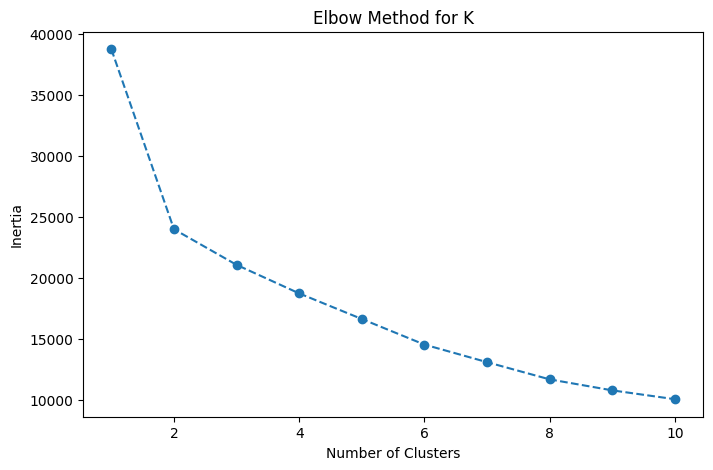

In [ ]:
# Elbow Method for Optimal K
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_patients_std)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for K')
plt.show()

### ***Using Silhoutte Score and graph for knowing accurate K***

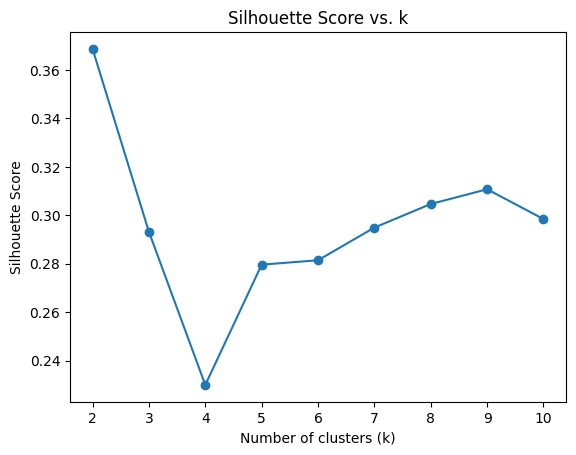

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(df_patients_std)
  score = silhouette_score(df_patients_std,kmeans.labels_)
  silhouette_scores.append(score)

# Plot Silhouette Scores
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. k')
plt.show()

### According to the Elbow Method and Silhoutte score the value of K=2 seems to be more appropriate for clustring in my case

### ***Performing K-Means Clustring***

***Visualising the data of few columns from the dataset on basis of k-means***

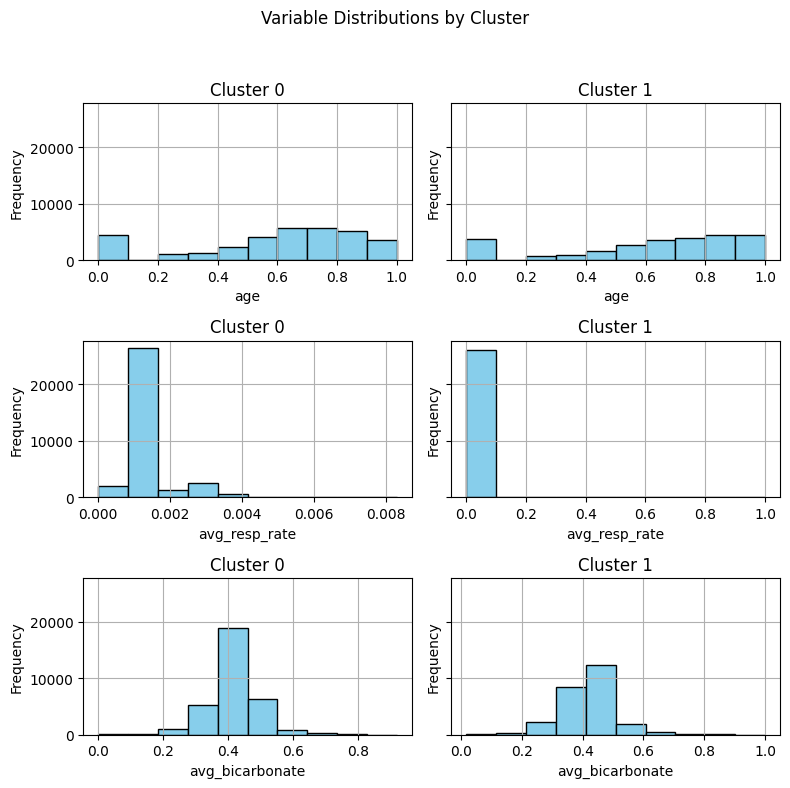

In [ ]:
# mentioning columns for visualising
pateints_features = df_patients_std[['age', 'avg_resp_rate','avg_bicarbonate']]

k = 2  #taking k as 2

kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df_patients_std['Cluster'] = kmeans.fit_predict(df_patients_std)

pateints_features = df_patients_std[['age', 'avg_resp_rate', 'avg_bicarbonate', 'Cluster']]

# Plotting the distributions of each variable for all clusters using subplots
variables = ['age', 'avg_resp_rate', 'avg_bicarbonate']
fig, axes = plt.subplots(nrows=len(variables), ncols=k, figsize=(8, 8), sharey=True)

for i, variable in enumerate(variables):
    for cluster in range(k):
        ax = axes[i, cluster]
        cluster_data = pateints_features[pateints_features['Cluster'] == cluster][variable]
        ax.hist(cluster_data, bins=10, color='skyblue', edgecolor='black')
        ax.set_title(f'Cluster {cluster}')
        ax.set_xlabel(variable)
        ax.set_ylabel('Frequency')
        ax.grid(True)


fig.suptitle('Variable Distributions by Cluster')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

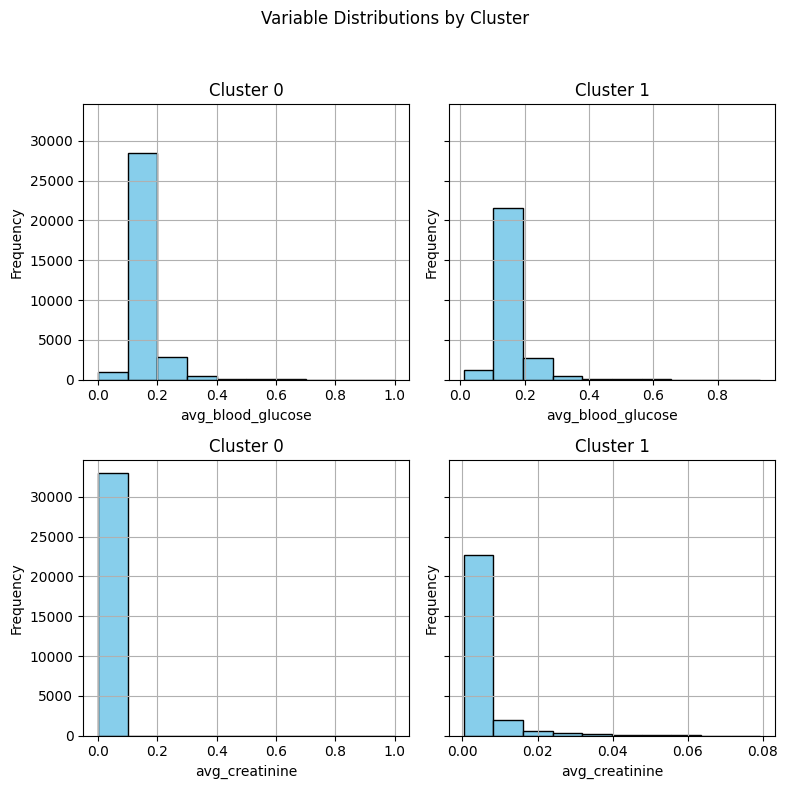

In [ ]:
# mentioning the columns for visualisation
pateints_features = df_patients_std[['avg_blood_glucose', 'avg_creatinine']]

k = 2
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df_patients_std['Cluster'] = kmeans.fit_predict(df_patients_std)

pateints_features = df_patients_std[['avg_blood_glucose', 'avg_creatinine', 'Cluster']]

# Plot the distributions of each variable for all clusters using subplots
variables = ['avg_blood_glucose', 'avg_creatinine']
fig, axes = plt.subplots(nrows=len(variables), ncols=k, figsize=(8, 8), sharey=True)

for i, variable in enumerate(variables):
    for cluster in range(k):
        ax = axes[i, cluster]
        cluster_data = pateints_features[pateints_features['Cluster'] == cluster][variable]
        ax.hist(cluster_data, bins=10, color='skyblue', edgecolor='black')
        ax.set_title(f'Cluster {cluster}')
        ax.set_xlabel(variable)
        ax.set_ylabel('Frequency')
        ax.grid(True)

fig.suptitle('Variable Distributions by Cluster')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

              age    gender  marital_status  religion  ethnicity  \
cluster                                                            
0        0.121827  0.551788        0.632026  0.559785   0.743314   
1        0.740184  0.560658        0.424980  0.433630   0.841422   

         avg_dias_press  std_dias_press    avg_hr    std_hr  avg_resp_rate  \
cluster                                                                      
0              0.026624        0.001107  0.001177  0.000012       0.002085   
1              0.025766        0.001390  0.000836  0.000032       0.001123   

         ...  std_hematrocrit  avg_platelet_count  std_platelet_count  \
cluster  ...                                                            
0        ...         0.092707            0.174284            0.070707   
1        ...         0.083063            0.147815            0.067320   

         avg_potasssium  std_potasssium  avg_sodium  std_sodium  \
cluster                                               

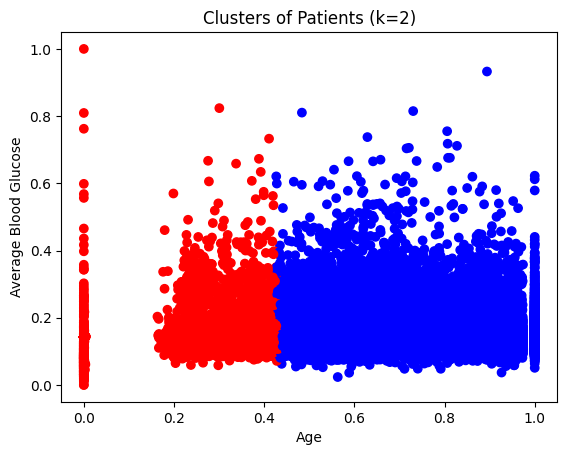

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Selecting the two columns for clustering
X = df_patients_std[['age', 'avg_blood_glucose']]

# Perform KMeans clustering with k=2
kmeans = KMeans(n_clusters=2, random_state=42)
df_patients_std['cluster'] = kmeans.fit_predict(X)  # Assign cluster labels

# Analyze cluster characteristics
cluster_means = df_patients_std.groupby('cluster').mean() #taking the mean for the group
print(cluster_means)

colors = ['red', 'blue']

plt.scatter(df_patients_std['age'], df_patients_std['avg_blood_glucose'], c=df_patients_std['cluster'], cmap=plt.matplotlib.cm.colors.ListedColormap(colors))
plt.xlabel('Age')
plt.ylabel('Average Blood Glucose')
plt.title('Clusters of Patients (k=2)')
plt.show()

              age    gender  marital_status  religion  ethnicity  \
cluster                                                            
0        0.122909  0.551188        0.630977  0.559479   0.742943   
1        0.740482  0.560837        0.425075  0.433593   0.841623   

         avg_dias_press  std_dias_press    avg_hr    std_hr  avg_resp_rate  \
cluster                                                                      
0              0.026638        0.001135  0.001176  0.000012       0.002082   
1              0.025761        0.001383  0.000836  0.000032       0.001123   

         ...  std_hematrocrit  avg_platelet_count  std_platelet_count  \
cluster  ...                                                            
0        ...         0.092727            0.174245            0.070652   
1        ...         0.083048            0.147800            0.067332   

         avg_potasssium  std_potasssium  avg_sodium  std_sodium  \
cluster                                               

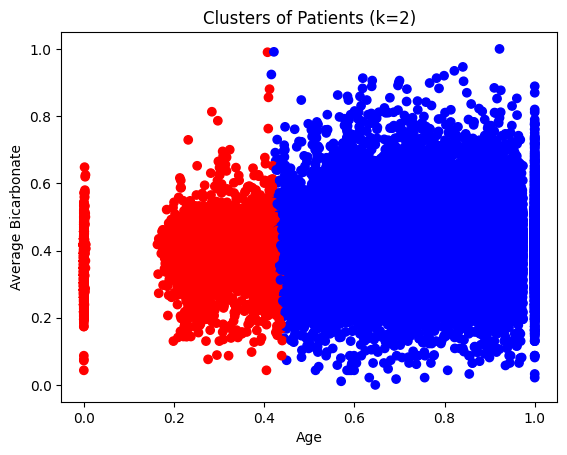

In [ ]:
# Selecting the two columns for clustering
X = df_patients_std[['age', 'avg_bicarbonate']]

# Perform KMeans clustering with k=2
kmeans = KMeans(n_clusters=2, random_state=42)
df_patients_std['cluster'] = kmeans.fit_predict(X)  # Assign cluster labels

# Analyze cluster characteristics
cluster_means = df_patients_std.groupby('cluster').mean()
print(cluster_means)

colors = ['red', 'blue']

# Visualize clusters
plt.scatter(df_patients_std['age'], df_patients_std['avg_bicarbonate'], c=df_patients_std['cluster'], cmap=plt.matplotlib.cm.colors.ListedColormap(colors))
plt.xlabel('Age')
plt.ylabel('Average Bicarbonate')
plt.title('Clusters of Patients (k=2)')
plt.show()

              age    gender  marital_status  religion  ethnicity  \
cluster                                                            
0        0.120993  0.552120        0.632517  0.559800   0.743161   
1        0.739949  0.560557        0.424999  0.433722   0.841390   

         avg_dias_press  std_dias_press    avg_hr    std_hr  avg_resp_rate  \
cluster                                                                      
0              0.026614        0.001106  0.001178  0.000012       0.002088   
1              0.025769        0.001390  0.000837  0.000032       0.001123   

         ...  std_hematrocrit  avg_platelet_count  std_platelet_count  \
cluster  ...                                                            
0        ...         0.092720            0.174259            0.070672   
1        ...         0.083067            0.147842            0.067332   

         avg_potasssium  std_potasssium  avg_sodium  std_sodium  \
cluster                                               

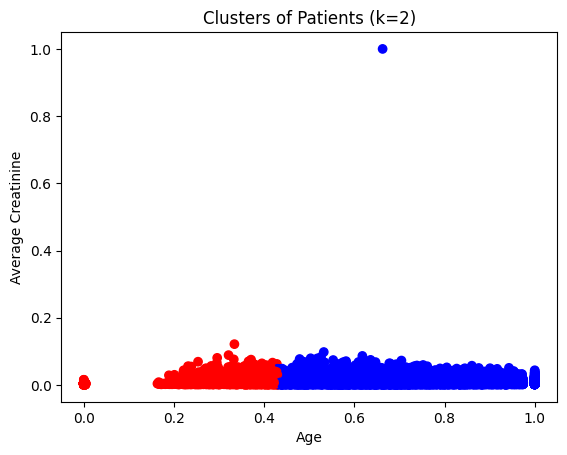

In [ ]:
# Selecting the two columns for clustering
X = df_patients_std[['age', 'avg_creatinine']]

# Perform KMeans clustering with k=2
kmeans = KMeans(n_clusters=2, random_state=42)
df_patients_std['cluster'] = kmeans.fit_predict(X)  # Assign cluster labels

# Analyze cluster characteristics
cluster_means = df_patients_std.groupby('cluster').mean()
print(cluster_means)

colors = ['red', 'blue']

# Visualize clusters
plt.scatter(df_patients_std['age'], df_patients_std['avg_creatinine'], c=df_patients_std['cluster'], cmap=plt.matplotlib.cm.colors.ListedColormap(colors))
plt.xlabel('Age')
plt.ylabel('Average Creatinine')
plt.title('Clusters of Patients (k=2)')
plt.show()

### ***Performing Heirarchical Clustring***



### Taking 3000 samples at random from the dataset

In [ ]:
df_patients_std_sample = df_patients_std.sample(n=3000, random_state=42)
df_patients_std_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3000 entries, 40028 to 38175
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      3000 non-null   float64
 1   gender                   3000 non-null   float64
 2   marital_status           3000 non-null   float64
 3   religion                 3000 non-null   float64
 4   ethnicity                3000 non-null   float64
 5   avg_dias_press           3000 non-null   float64
 6   std_dias_press           3000 non-null   float64
 7   avg_hr                   3000 non-null   float64
 8   std_hr                   3000 non-null   float64
 9   avg_resp_rate            3000 non-null   float64
 10  std_resp_rate            3000 non-null   float64
 11  avg_spo2                 3000 non-null   float64
 12  std_spo2                 3000 non-null   float64
 13  avg_sys_press            3000 non-null   float64
 14  std_sys_press           

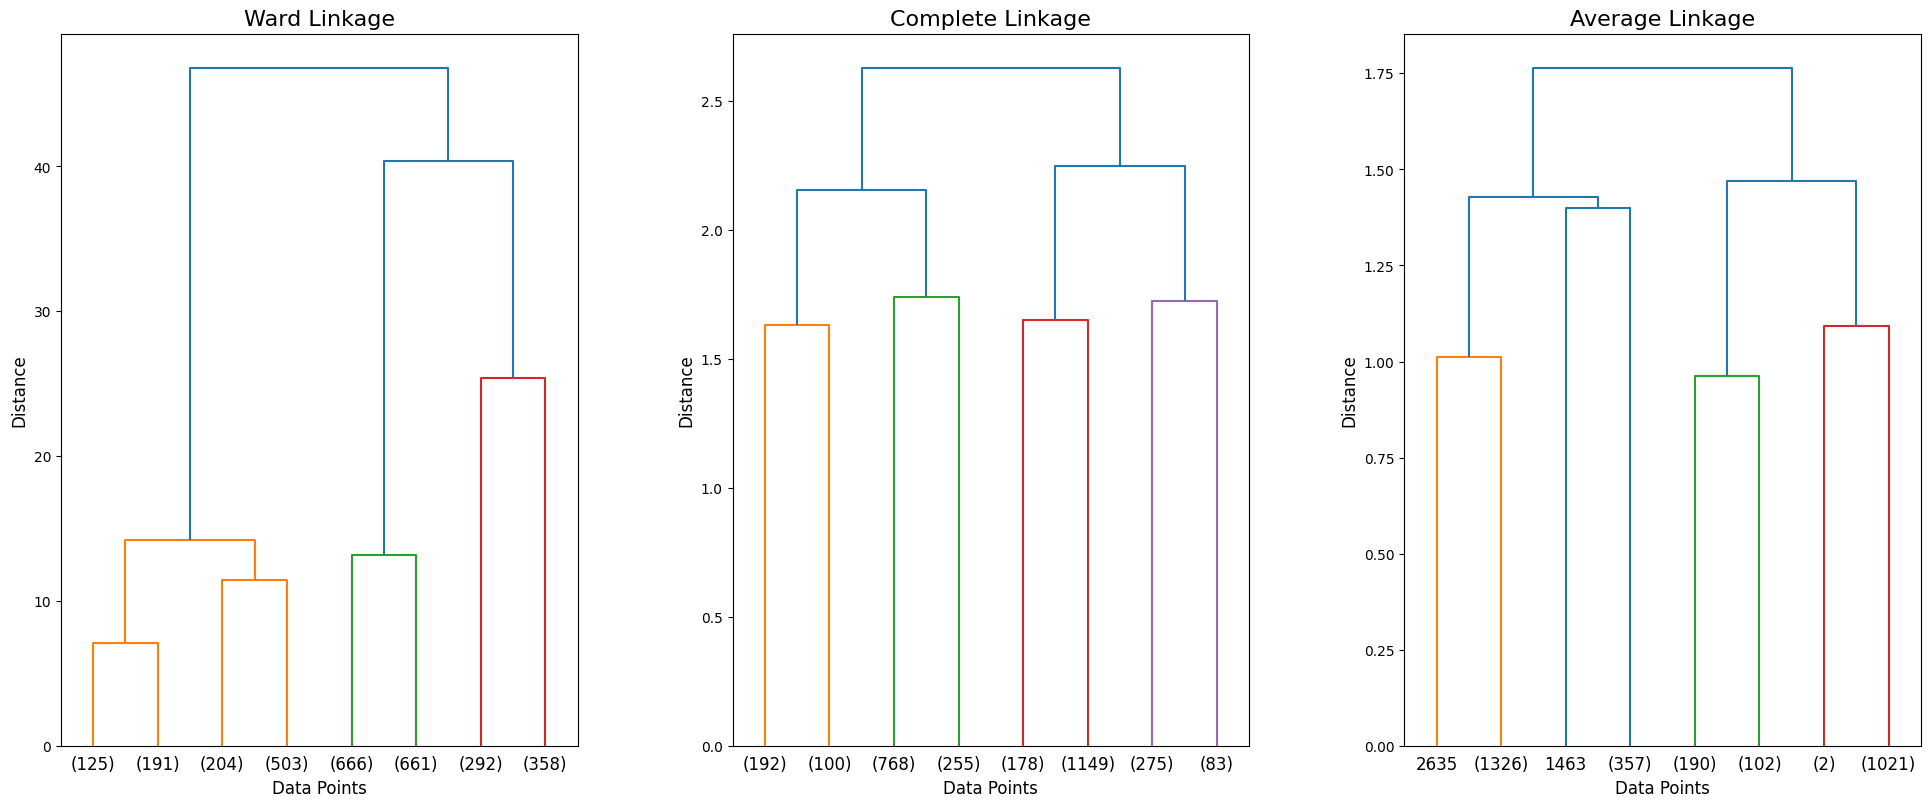

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

def plot_dendrogram(data, method, ax):
    #Plots a dendrogram on the given axes using the specified linkage method.

    linkage_matrix = linkage(data, method=method)
    dendrogram(linkage_matrix, truncate_mode='level', p=2, ax=ax)
    ax.set_title(f'{method.capitalize()} Linkage', fontsize=16)
    ax.set_xlabel('Data Points', fontsize=12)
    ax.set_ylabel('Distance', fontsize=12)


data = df_patients_std_sample

# linkage methods we are using
linkage_methods = ['ward', 'complete', 'average']

fig, axes = plt.subplots(1, 3, figsize=(24, 8))
fig.subplots_adjust(top=1.0, wspace=0.3)  # Adjust spacing

# Plotting dendrograms
for ax, method in zip(axes, linkage_methods):
    plot_dendrogram(data, method, ax)

plt.show()

### ***Visualising the Clusters with heirarchical clustering***

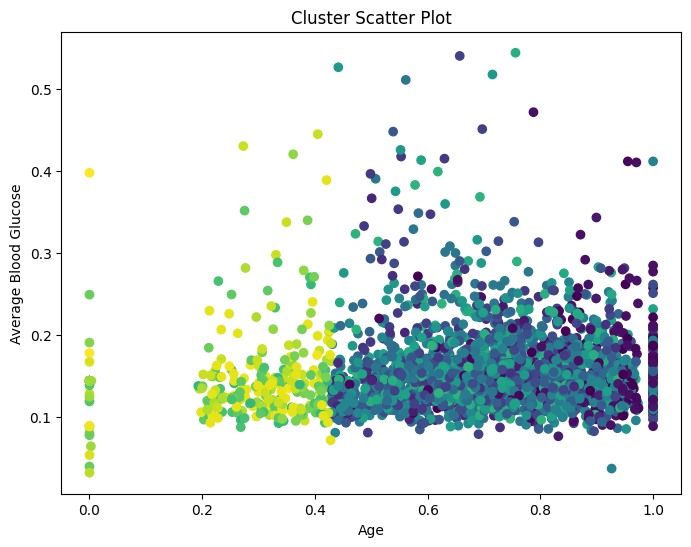

In [ ]:
distance_threshold = 2
cluster_assignments = fcluster(linkage(data, method='ward'), t=distance_threshold, criterion='distance')

# Add a scatter plot to visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(data['age'], data['avg_blood_glucose'], c=cluster_assignments, cmap='viridis')  # Choose relevant features
plt.xlabel('Age')
plt.ylabel('Average Blood Glucose')
plt.title('Cluster Scatter Plot')
plt.show()

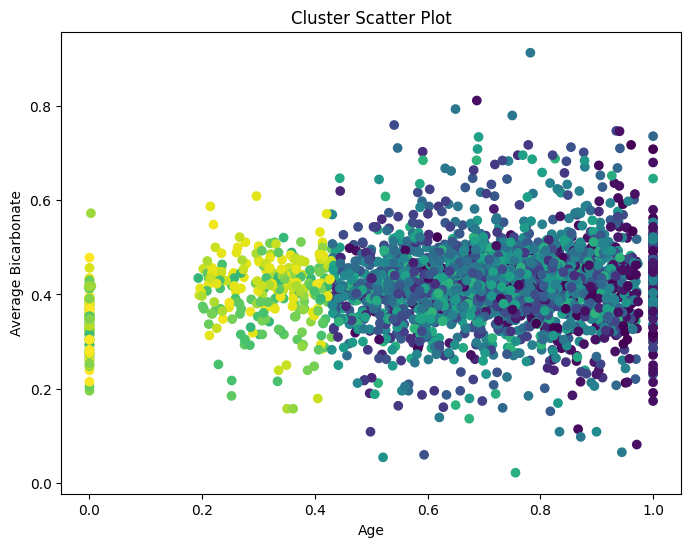

In [ ]:
distance_threshold = 2
cluster_assignments = fcluster(linkage(data, method='ward'), t=distance_threshold, criterion='distance')

# Add a scatter plot to visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(data['age'], data['avg_bicarbonate'], c=cluster_assignments, cmap='viridis')  # Choose relevant features
plt.xlabel('Age')
plt.ylabel('Average Bicarbonate')
plt.title('Cluster Scatter Plot')
plt.show()

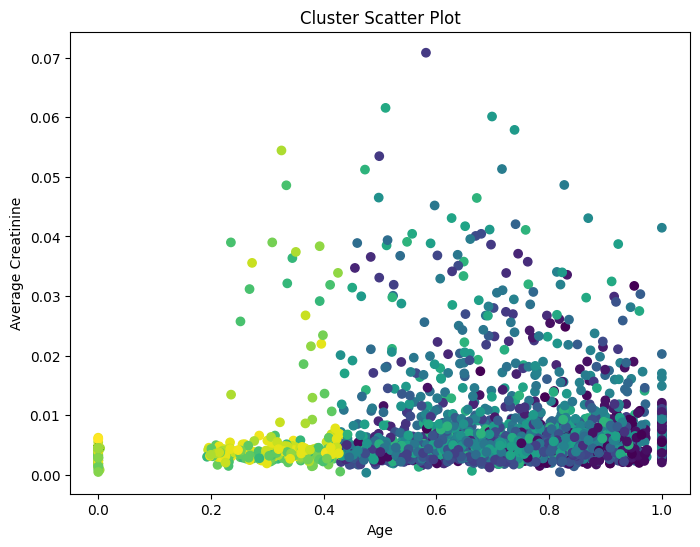

In [ ]:
distance_threshold = 2
cluster_assignments = fcluster(linkage(data, method='ward'), t=distance_threshold, criterion='distance')

# Add a scatter plot to visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(data['age'], data['avg_creatinine'], c=cluster_assignments, cmap='viridis')  # Choose relevant features
plt.xlabel('Age')
plt.ylabel('Average Creatinine')
plt.title('Cluster Scatter Plot')
plt.show()